<a href="https://colab.research.google.com/github/awiksshiith-narang/Fashion_classifier/blob/main/Fashion_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Downloading TensorFlow datasets:**

In [1]:
!pip install -U tensorflow_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Importing required libraries:**

In [2]:
import tensorflow as tf
import logging
logging.getLogger( "tensorflow" ).setLevel( logging.ERROR )
import tensorflow_datasets as tfds
import math as m
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

**Checking the version of TensorFlow:**

In [3]:
print( tf.__version__ )

2.12.0


**Loading the required datasets:**

In [4]:
dataset, metadata = tfds.load( 'fashion_mnist', as_supervised = True, with_info = True )

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteI6Y85K/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteI6Y85K/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


**Splitting the datasets:**

In [5]:
train_dataset, test_dataset = dataset[ 'train' ], dataset[ 'test' ]

**Creating a name list of outputs:**

In [6]:
class_names = [ 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot' ]

**Exploring the data:**

In [7]:
num_train_examples = metadata.splits[ 'train' ].num_examples
num_test_examples = metadata.splits[ 'test' ].num_examples
print( "No, of train examples: {}".format( num_train_examples ) )
print( "No, of test examples: {}".format( num_test_examples ) )

No, of train examples: 60000
No, of test examples: 10000


**Preprocessing the data:**

In [8]:
def normalize( images, labels ):
  images = tf.cast( images, tf.float32 )
  images /= 255
  return images, labels

train_dataset = train_dataset.map( normalize )
test_dataset = test_dataset.map( normalize )

**Plotting the first 24 images:**

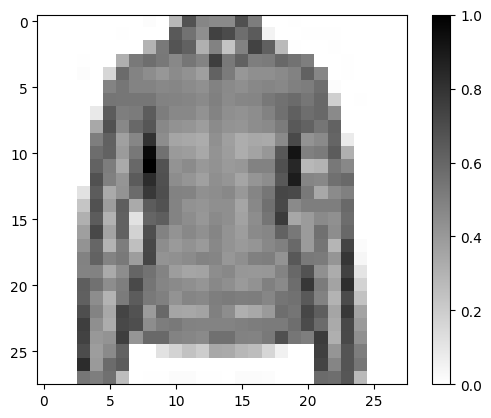

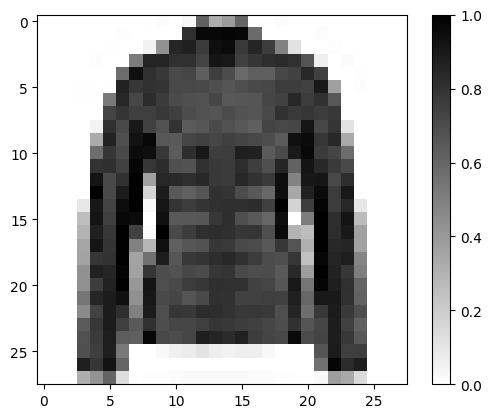

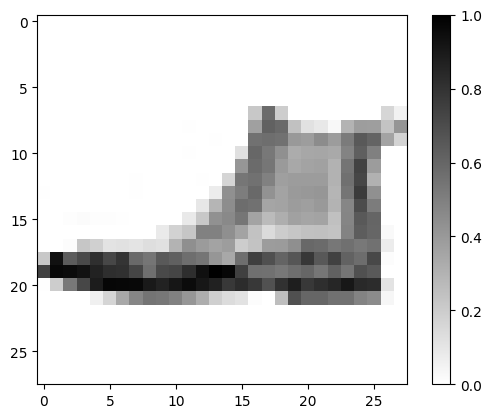

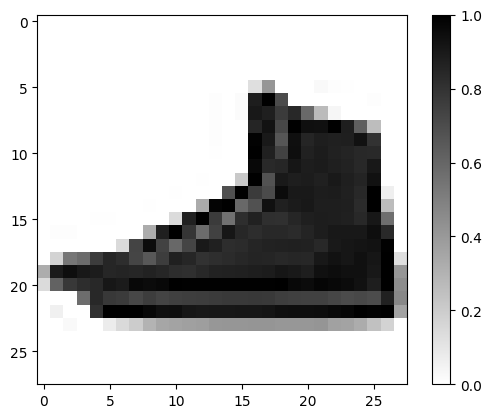

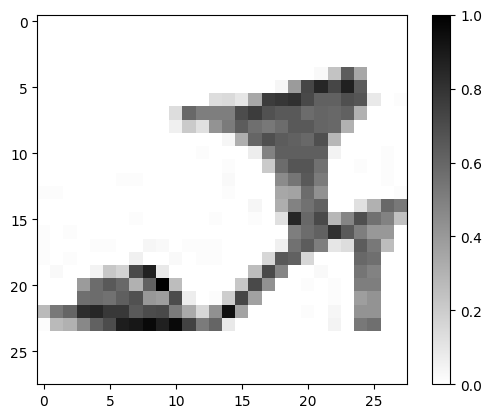

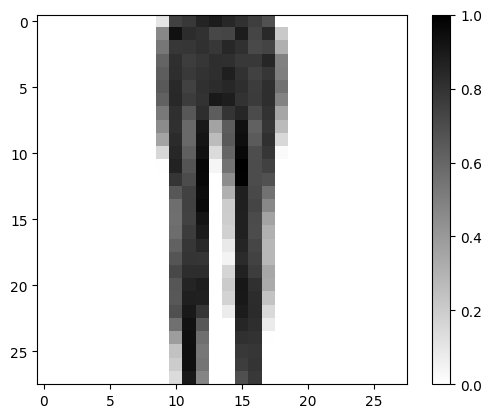

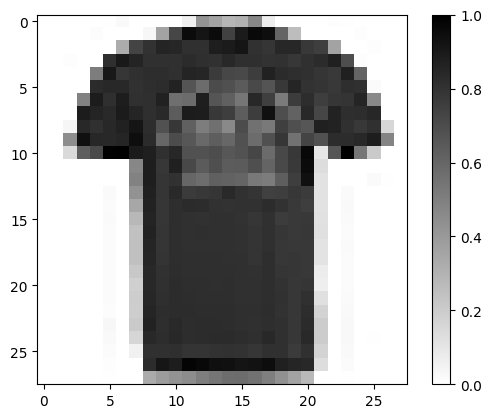

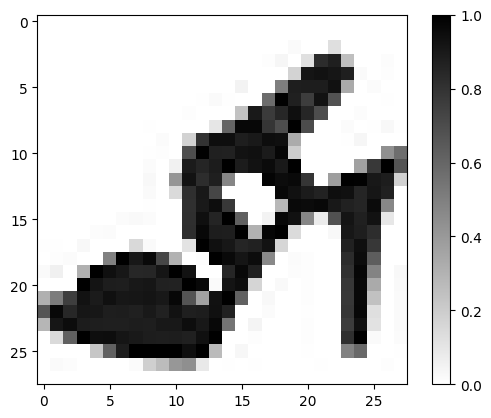

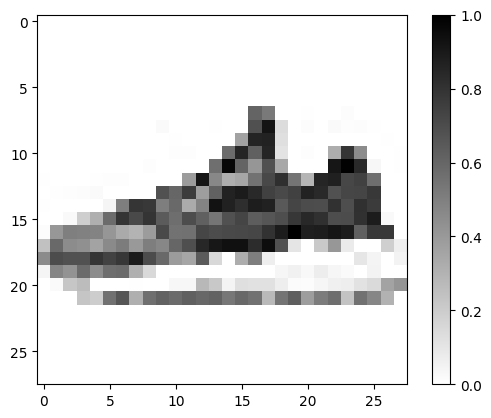

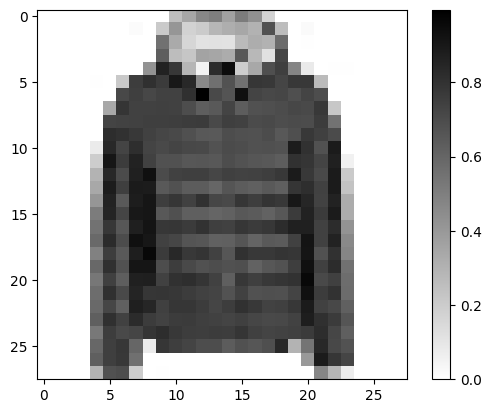

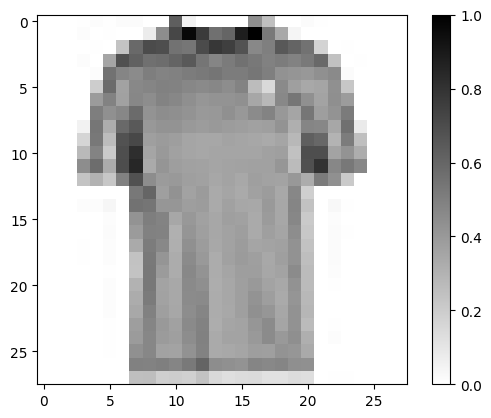

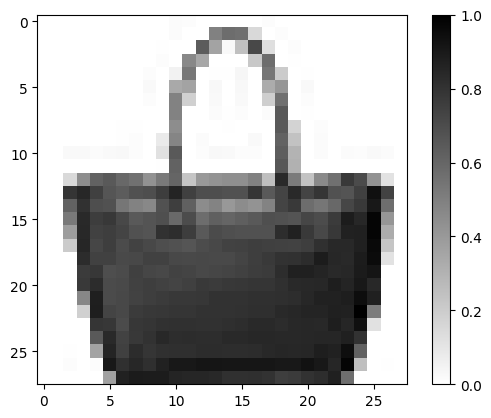

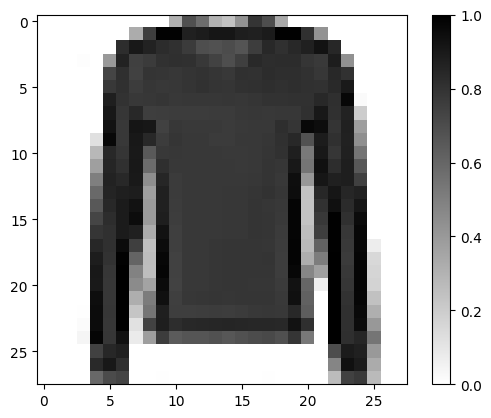

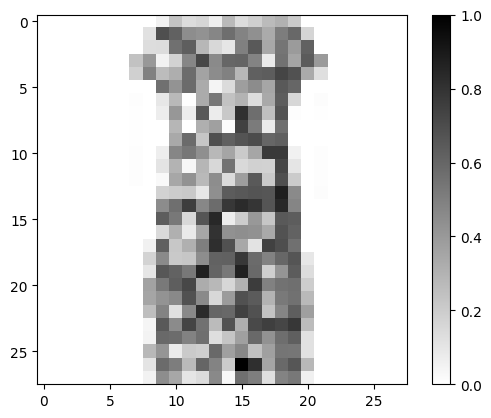

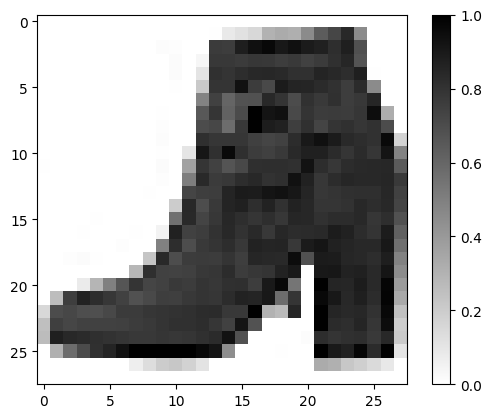

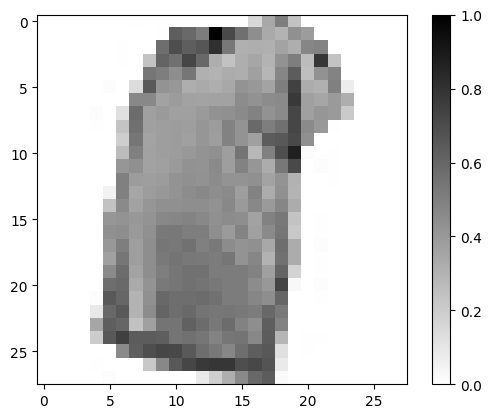

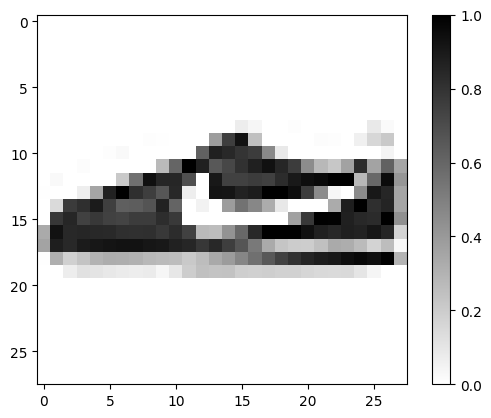

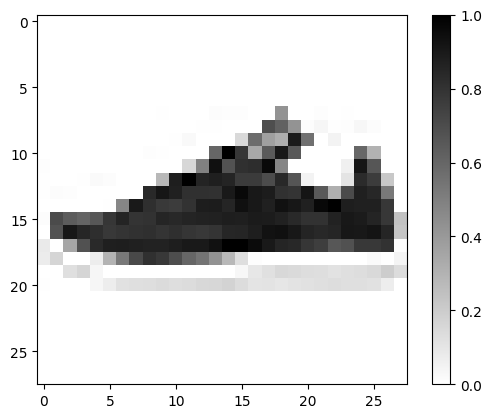

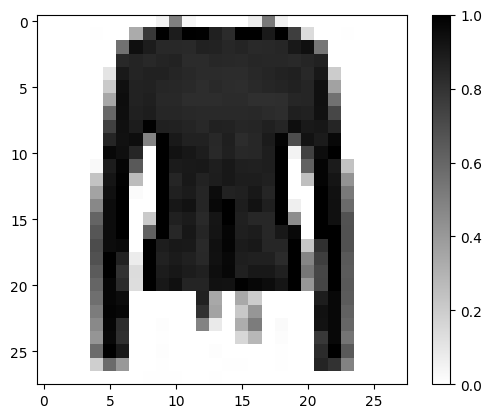

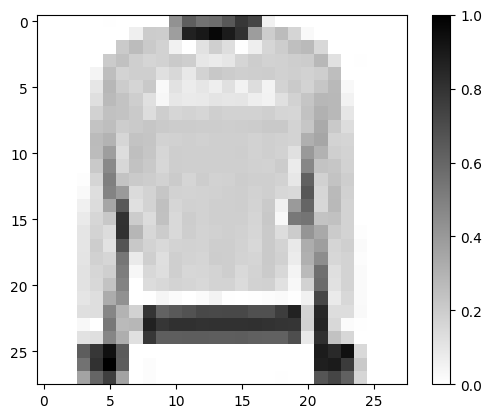

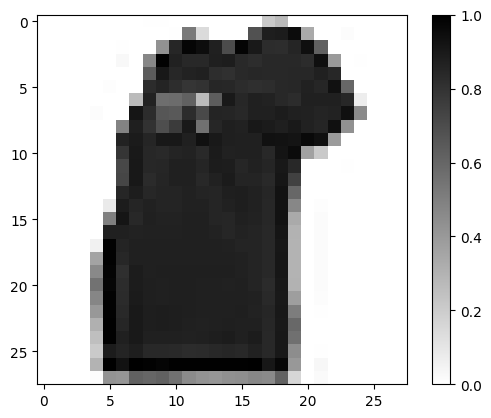

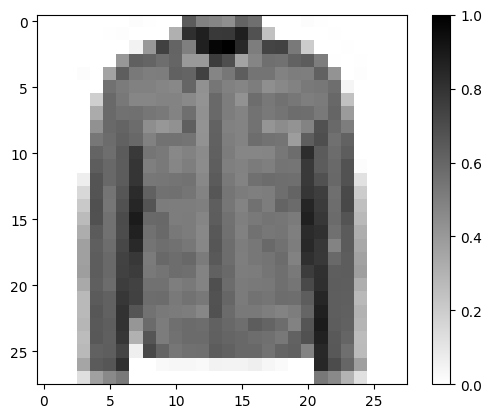

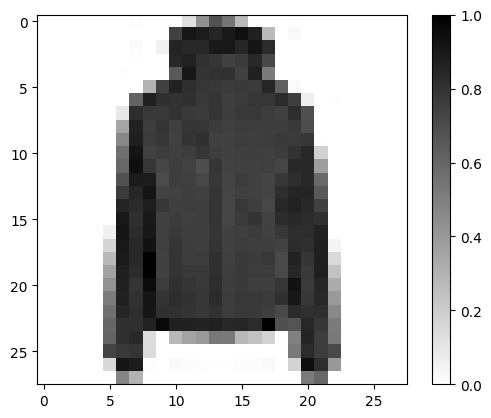

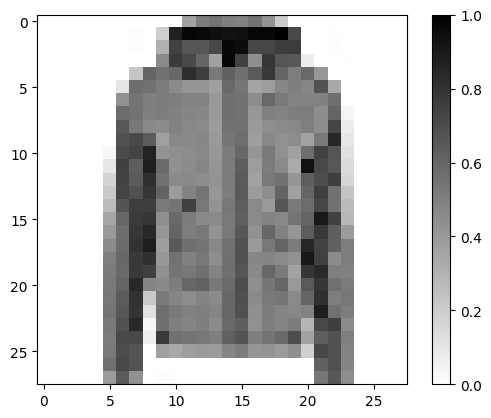

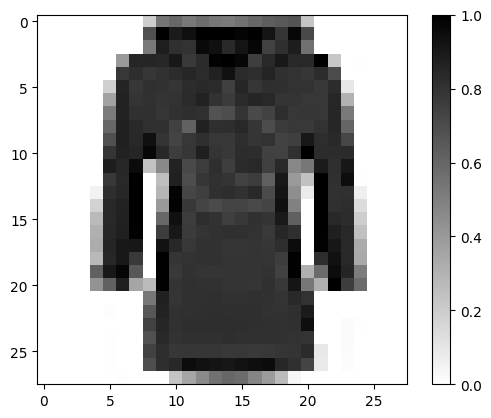

In [9]:
for image, label in test_dataset.take( 25 ):
  image = image.numpy().reshape( ( 28, 28 ) )
  plt.figure()
  plt.imshow( image, cmap = plt.cm.binary )
  plt.colorbar()
  plt.grid( False )
  plt.show()

**Building the model:**

In [10]:
model = tf.keras.Sequential( [ tf.keras.layers.Conv2D( 32, ( 3, 3 ), padding = 'same', activation = tf.nn.relu, input_shape = ( 28, 28, 1 ) ), tf.keras.layers.MaxPooling2D( ( 2, 2 ), strides = 2 ), tf.keras.layers.Conv2D( 64, ( 3, 3 ), padding = 'same', activation = tf.nn.relu ), tf.keras.layers.MaxPooling2D( ( 2, 2 ), strides = 2 ), tf.keras.layers.Flatten(), tf.keras.layers.Dense( 128, activation = tf.nn.relu ), tf.keras.layers.Dense( 10, activation = tf.nn.softmax ) ] )

**Compiling the model:**

In [11]:
model.compile( loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = [ 'accuracy' ] )

**Setting iteration parameters:**

In [12]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle( num_train_examples ).batch( BATCH_SIZE )
test_dataset = test_dataset.batch( BATCH_SIZE )

**Training the model:**

In [13]:
model.fit( train_dataset, epochs = 10, steps_per_epoch = m.ceil( num_train_examples/BATCH_SIZE ) )

Epoch 1/10
1875/1875 [==============================] - 25s 5ms/step - loss: 0.3928 - accuracy: 0.8578
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2587 - accuracy: 0.9065
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2108 - accuracy: 0.9231
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1794 - accuracy: 0.9352
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1500 - accuracy: 0.9451
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1294 - accuracy: 0.9522
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1077 - accuracy: 0.9610
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0895 - accuracy: 0.9673
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0747 - accuracy: 0.9723
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss:

**Testing the model:**

In [15]:
test_loss, test_accuracy = model.evaluate( test_dataset, steps = m.ceil( num_test_examples/BATCH_SIZE ) )
print( "Accuracy on testing dataset: {}".format( test_accuracy ) )

313/313 [==============================] - 1s 3ms/step - loss: 0.3601 - accuracy: 0.9123
Accuracy on testing dataset: 0.9122999906539917


**Making predictions:**

In [16]:
for test_images, test_labels in test_dataset.take( 1 ):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict( test_images )

1/1 [==============================] - 0s 402ms/step


In [17]:
print( predictions.shape )

(32, 10)


In [18]:
print( np.argmax( predictions[ 0 ] ) )

4


In [19]:
print( test_labels[ 0 ] )

4


**Plotting images, predicted class, probability and actual class:**

In [36]:
def plot_image( i, predictions_array, true_labels, images ):
  predictions_array, true_label, img = predictions_array[ i ], true_labels[ i ], images[ i ]
  plt.grid( False )
  plt.xticks( [] )
  plt.yticks( [] )
  plt.imshow( img[ ..., 0 ], cmap = plt.cm.binary )
  predicted_label = np.argmax( predictions_array )
  plt.xlabel( '{} {}% ({})'.format( class_names[ predicted_label ], 100 * np.max( predictions_array ), class_names[ true_label ] ) )
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

def plot_value_array( i, predictions_array, true_labels ):
  predictions_array, true_label = predictions_array[ i ], true_labels[ i ]
  plt.grid( False )
  plt.xticks( [] )
  thisplot = plt.bar( range( 10 ), predictions_array, color = '#777777' )
  plt.ylim( [ 0, 1 ] )
  predicted_label = np.argmax( predictions_array )
  thisplot[ predicted_label ].set_color( 'red' )
  thisplot[ true_label ].set_color( 'green' )

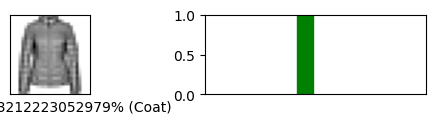

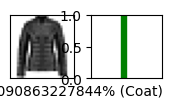

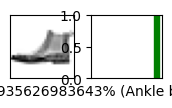

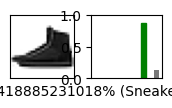

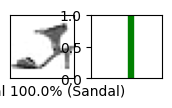

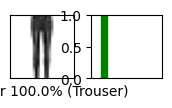

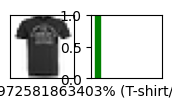

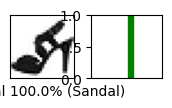

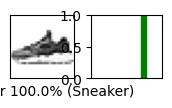

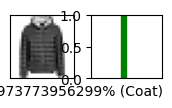

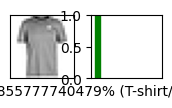

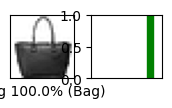

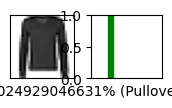

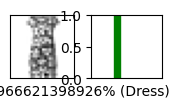

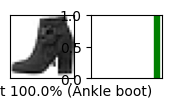

In [38]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure( figsize = ( 2 * 2* num_rows, 2 * num_cols ) )
for i in range( num_images ):
  plt.subplot( num_rows, 2 * num_cols, 2 * i + 1 )
  plot_image( i, predictions, test_labels, test_images )
  plt.subplot( num_rows, 2 * num_cols, 2 * i + 2 )
  plot_value_array( i, predictions, test_labels )
  plt.show()